### **Future regressors é mais uma informção que pode ser adicionada a previsão o contrario da  Lagged regressors que olha o passado, este olha o futuro para ter ainda mais acuracia sobre as previsões futuras, com o paramentro add_lagged_regressor("temperature") e especificando a coluna que tem relação obtemos um residuo ainda mais acurado e assim poderemos aumentar o n_lags e obter uma melhor previsão.negrito**

In [1]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet


Found existing installation: torch 2.1.0+cu121
Uninstalling torch-2.1.0+cu121:
  Successfully uninstalled torch-2.1.0+cu121
Found existing installation: notebook 6.5.5
Uninstalling notebook-6.5.5:
  Successfully uninstalled notebook-6.5.5
Found existing installation: notebook_shim 0.2.3
Uninstalling notebook_shim-0.2.3:
  Successfully uninstalled notebook_shim-0.2.3
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: tensorflow-datasets 4.9.4
Uninstalling tensorflow-datasets-4.9.4:
  Successfully uninstalled tensorflow-datasets-4.9.4
Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Successfully uninstalled prophet-1.1.5
Found existing installation: torchaudio 2.1.0+cu121
Uninstalling torchaudio-2.1.0+cu121:
  Successfully uninstalled torchaudio-2.1.0+cu121
Found existing installation: torchdata 0.7.0
Uninstalling torchdata-0.7.0:
  Successfully uninstalled torchd

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

In [3]:
# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
df.head()

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


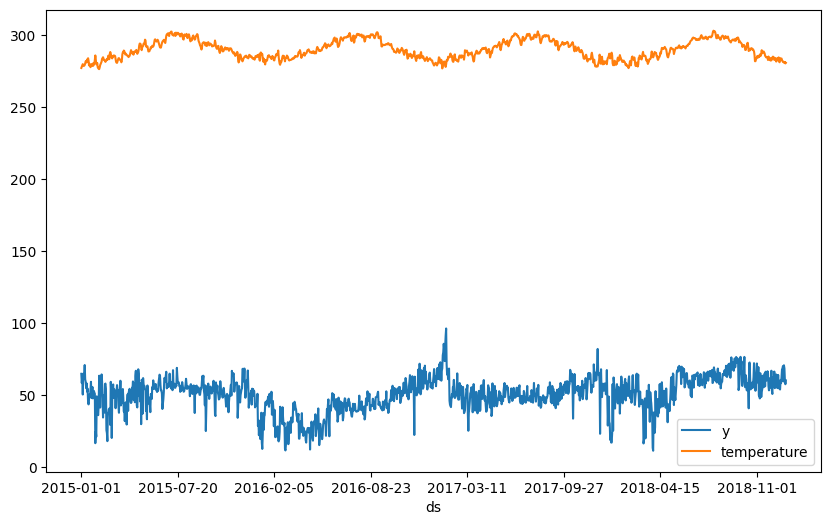

In [4]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10,6))

In [6]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("plotly")

# Add the new future regressor
m.add_future_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

In [7]:
m.plot_components(forecast, components=["future_regressors"])

In [8]:
m.plot_parameters(components=["future_regressors"])

In [9]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,56.891750,71.577316,0.454500,0.0,0
1,51.799210,66.886223,0.401208,0.0,1
2,46.828819,62.349545,0.351404,0.0,2
3,41.665314,57.433189,0.301254,0.0,3
4,36.181530,51.233532,0.248336,0.0,4
...,...,...,...,...,...
168,4.857070,6.449207,0.005066,0.0,168
169,4.852357,6.471344,0.005077,0.0,169
170,4.862561,6.486827,0.005071,0.0,170
171,4.860109,6.506968,0.005078,0.0,171


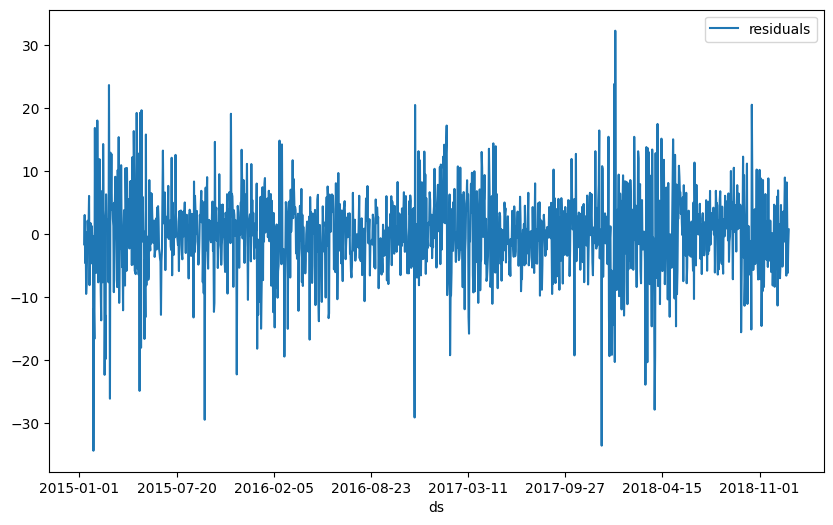

In [10]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))